In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __str__(self):
        return f"{self.rank} of {self.suit}"

    def __repr__(self):
        return self.__str__()

class Deck:
    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    ranks = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]

    def __init__(self):
        self.cards = [Card(rank, suit) for rank in Deck.ranks for suit in Deck.suits]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self, count):
        drawn_cards = self.cards[:count]
        self.cards = self.cards[count:]
        return drawn_cards

deck = Deck()
deck.shuffle()

In [4]:
sample_size = 10
sample = deck.draw(sample_size)
print("Sample drawn:", sample)

Sample drawn: [A of Clubs, A of Diamonds, 4 of Spades, A of Spades, 8 of Hearts, 8 of Clubs, Q of Clubs, J of Diamonds, 10 of Hearts, 9 of Clubs]


drawing 10 cards from the deck, without replacement

In [6]:
def calculate_probabilities(sample):
    rank_counts = {rank: 0 for rank in Deck.ranks}
    suit_counts = {suit: 0 for suit in Deck.suits}

    for card in sample:
        rank_counts[card.rank] += 1
        suit_counts[card.suit] += 1

    total_cards = len(sample)
    rank_probabilities = {rank: count / total_cards for rank, count in rank_counts.items()}
    suit_probabilities = {suit: count / total_cards for suit, count in suit_counts.items()}

    return rank_probabilities, suit_probabilities

rank_probabilities, suit_probabilities = calculate_probabilities(sample)
print("Rank probabilities:", rank_probabilities)
print("Suit probabilities:", suit_probabilities)

Rank probabilities: {'A': 0.3, '2': 0.0, '3': 0.0, '4': 0.1, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.2, '9': 0.1, '10': 0.1, 'J': 0.1, 'Q': 0.1, 'K': 0.0}
Suit probabilities: {'Hearts': 0.2, 'Diamonds': 0.2, 'Clubs': 0.4, 'Spades': 0.2}


PROBABILITY OF DRAWING A 2 BY SIMULATION

In [7]:
def simulate_draws(deck, max_sample_size):
    results = []
    for size in range(1, max_sample_size + 1):
        deck = Deck()
        deck.shuffle()
        sample = deck.draw(size)
        rank_probabilities, suit_probabilities = calculate_probabilities(sample)
        results.append((size, rank_probabilities, suit_probabilities))
    return results

results = simulate_draws(deck, 52)

PROBABILITY OF DRAWING A 2 THEORITICALLY

In [8]:
number_2_cards_theoretical_probability = 4 / len(deck.cards)

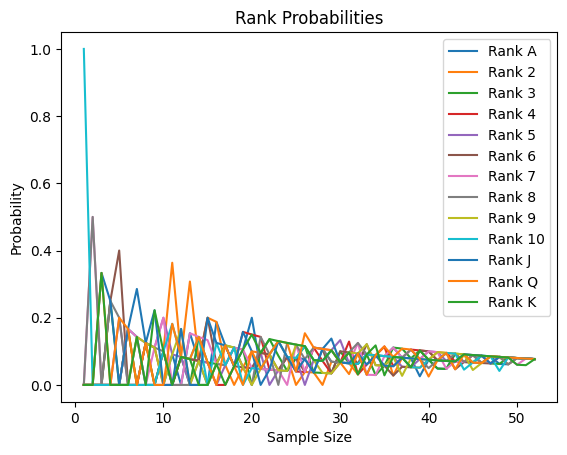

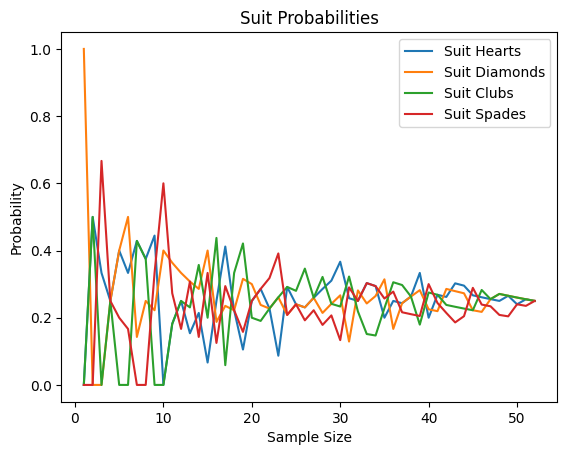

In [13]:
import matplotlib.pyplot as plt

def plot_probabilities(results):
    sample_sizes = [result[0] for result in results]
    rank_probabilities = [result[1] for result in results]
    suit_probabilities = [result[2] for result in results]

    for rank in Deck.ranks:
        probabilities = [prob[rank] for prob in rank_probabilities]
        plt.plot(sample_sizes, probabilities, label=f"Rank {rank}")

    plt.xlabel("Sample Size")
    plt.ylabel("Probability")
    plt.title("Rank Probabilities")
    plt.legend()
    plt.show()

    for suit in Deck.suits:
        probabilities = [prob[suit] for prob in suit_probabilities]
        plt.plot(sample_sizes, probabilities, label=f"Suit {suit}")

    plt.xlabel("Sample Size")
    plt.ylabel("Probability")
    plt.title("Suit Probabilities")
    plt.legend()
    plt.show()

plot_probabilities(results)